# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

In [2]:
# my additional libraries
import collections

from sklearn.cross_validation import train_test_split as sk_split
from sklearn.preprocessing import scale
from statsmodels.regression.linear_model import add_constant


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Galvin, Owen

### Part (b): Course Number

CS 109a Extension

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

### <font color='darkgreen'>Solution, Part(a):</font>

In [3]:
#lab 4 notebook

# read in data, assign all rows/all columns except last to data_x & all rows/last-column-only to data_y
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',', skiprows=1)
data_x = data[:, :-1]
data_y = data[:, -1]

In [4]:
#above hard to decipher visually and even as a dataframe it can be less than ideal
# But rounding down the dataframe will help, in terms of reviewing by eye.
# Since it is only 100 records, easy enough to re-load from scratch as a dataframe and just ignore the y column
# Have the option to only load in 10 rows to begin with, but again .txt is small (& the df will be used later)
data_df = pd.read_csv('datasets/dataset_1.txt', delimiter=',')
data_df.apply(lambda v: np.round(v, 2)).head(10)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.96,0.96,0.96,0.34,0.52,0.54,0.44,0.83,0.15,0.01,0.29
1,0.62,0.62,0.62,0.29,0.51,0.50,0.45,0.91,0.37,0.44,-0.28
2,1.00,1.00,1.00,0.11,0.10,0.15,0.14,0.64,0.54,0.90,-0.51
3,0.82,0.82,0.82,0.20,0.33,0.36,0.28,0.11,0.48,0.26,-0.18
4,0.30,0.30,0.30,0.18,0.27,0.29,0.26,0.38,0.74,0.47,-0.63
5,0.04,0.04,0.04,0.34,0.62,0.57,0.59,0.65,0.06,0.56,-0.03
6,0.55,0.55,0.55,0.12,0.11,0.09,0.11,0.93,0.12,0.22,0.30
7,0.89,0.89,0.89,0.28,0.42,0.35,0.35,0.59,0.71,0.89,-0.37
8,0.74,0.74,0.74,0.35,0.50,0.46,0.47,0.15,0.75,0.62,-0.58
9,0.02,0.02,0.02,0.09,0.09,0.08,0.09,0.30,0.71,0.87,-0.42


#### By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?
Among those sets that appear to be correlated:
- positively & strongly: 
x1, x2, x3
- positively, somewhat less strong:
x5, x7
- positively, less strong still, all four amongst themselves
x4, x5, x6, x7 

In theory could iterate through the data in pairwise fashion and display 5 or so records from each member of a pair, but given the next part below, this seems like overkill. And of course I'm only looking at the first 10 or so records, looking at more might cause everything to blur together though.

In [5]:
# Compute the cofficient of correlation between each pair of predictors, 

# np doc: Each row of x represents a variable, and each column a single observation of all those variables.
corr = np.corrcoef(data_x.T)
# confirm 10 x 10 as expected
print 'shape:', corr.shape
# for display, round for the same reason as with orig dataframe, makes it much easier to read
pd.DataFrame(corr).apply(lambda v: np.round(v, 2))


shape: (10L, 10L)


,0,1,2,3,4,5,6,7,8,9
0,1.00,1.00,1.00,-0.19,-0.23,-0.22,-0.23,-0.05,-0.06,0.05
1,1.00,1.00,1.00,-0.19,-0.23,-0.22,-0.23,-0.05,-0.06,0.05
2,1.00,1.00,1.00,-0.19,-0.23,-0.22,-0.23,-0.05,-0.06,0.05
3,-0.19,-0.19,-0.19,1.00,0.97,0.96,0.97,0.06,0.11,-0.01
4,-0.23,-0.23,-0.23,0.97,1.00,0.98,0.98,0.08,0.13,-0.01
5,-0.22,-0.22,-0.22,0.96,0.98,1.00,0.98,0.08,0.12,-0.02
6,-0.23,-0.23,-0.23,0.97,0.98,0.98,1.00,0.07,0.11,-0.02
7,-0.05,-0.05,-0.05,0.06,0.08,0.08,0.07,1.00,-0.13,0.05
8,-0.06,-0.06,-0.06,0.11,0.13,0.12,0.11,-0.13,1.00,0.01
9,0.05,0.05,0.05,-0.01,-0.01,-0.02,-0.02,0.05,0.01,1.00


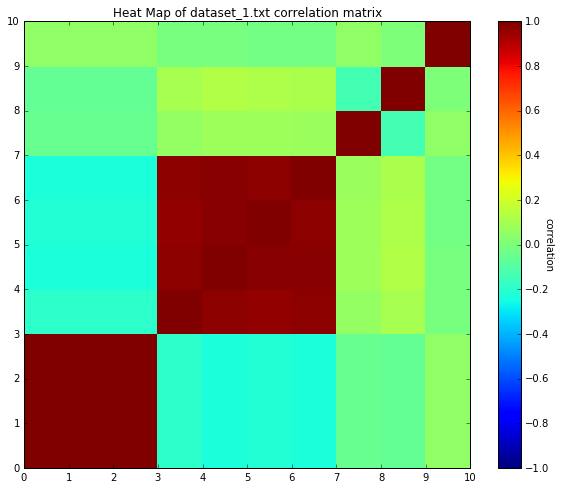

In [6]:
# and visualize the matrix of correlation coefficients using a heat map. 

# my recollection is that in lab video prof said red was for strong correlation 
#  and blue for not correlated. But from what I can tell it should have been that blue was for 
#  negative correlation, and with default implementation the heatmap from the lab the red-blue
#  color range was applied to the range of source data. The result was that the most negatively
#  correlated values wound up as dark blue, even though that was only around -0.023 and not near -1.0.
# So I attempted to reset the color range to be from -1 (blue, very negative correlation) to 
#  1 (red, very high positive correlation), with no correlation appearing as a foam-green. 
# Maybe I'm wrong but I'm sticking with it.
# Of course the new color map has no effect on the 5 groupings and the essence of the exercise.

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_yticks(np.arange(data.shape[0]), minor=False)
ax.set_xticks(np.arange(data.shape[1]), minor=False)
# set the range on the color map from -1 to 1
pcm = ax.pcolor(corr, vmin=-1.,vmax=1.)
ax.set_title('Heat Map of dataset_1.txt correlation matrix')

cbar = fig.colorbar(pcm)
cbar.set_label('correlation', rotation=270)

plt.show()

#### Do the predictors fall naturally into groups based on the correlation values?

Yes, two groups (larger red squares, one in lower left & one in middle) that share high correlation, and then three standalone 'groups' with one predictor each (x8, x9, x10), that don't appear to be correlated with any other value.

#### If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose?
I would select 5 predictors, one from each group defined in the above heatmap visualization. For the non-correlated values that fall into their own groups, it would seem evident each of those (x8, x9, x10) would be included in this predictor set. For the remaining two values, I don't think that can be determined without running the numbers as it were, so I would only say that one of x1/x2/x3 and one of x4/x5/x6/x7 will be included.

------

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

### <font color='darkgreen'>Solution, Part(b):</font>

In [7]:
# Apply the variable selection methods to choose a minimal subset of predictors that yield high prediction accuracy
# 1) Exhaustive search
# use the Bayesian Information Criterion (BIC) to choose the subset size.

# Lab 4 solution code, update with my variables, a little optimization here and there

min_bic = 1e10 # set some initial large value for min BIC score
best_subset = [] # best subset of predictors

# Create all possible subsets of the set of 10 predictors
predictor_set = set(xrange(10)) # predictor set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Repeat for every possible size of subset, update size_k to be explicit size value
for size_k in xrange(1, 11): 
    # Create all possible subsets of size 'size', 
    # using the 'combination' function from the 'itertools' library
    subsets_of_size_k = it.combinations(predictor_set, size_k) 
    
    max_r_squared = -1e10 # set some initial small value for max R^2 score
    best_k_subset = [] # best subset of predictors of size k
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:    
        # Use only a subset of predictors in the training data
        x_subset = data_x[:, predictor_subset]

        # Fit and evaluate R^2 -- not doing anything with model beyond R2, so chain for clarity
        r_squared = OLS(data_y, x_subset).fit().rsquared
        
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(r_squared > max_r_squared): 
            max_r_squared = r_squared
            best_k_subset = predictor_subset[:]
                
    # Use only the best subset of size k for the predictors
    # all rows but only the columns/predictors that are 'best'
    x_subset = data_x[:, best_k_subset]
        
    # Fit and evaluate BIC of the best subset of size k, chain again
    bic = OLS(data_y, x_subset).fit().bic

    # Update minimum BIC and best predictor subset
    # If current predictor has a lower BIC score than that of the best subset 
    # we've found so far, remember the current predictor as the best!
    if (bic < min_bic): 
        min_bic = bic
        best_subset = best_k_subset[:]
    
print('Best subset by exhaustive search, predictor index:')
print sorted(best_subset)
print('Corresponding predictor labels:')
print ', '.join(data_df.columns[list(sorted(best_subset))])

Best subset by exhaustive search, predictor index:
[0, 5, 7, 8, 9]
Corresponding predictor labels:
x1, x6, x8, x9, x10


In [8]:
# Apply the variable selection methods to choose a minimal subset of predictors that yield high prediction accuracy
# Step-wise forward selection or Step-wise backward selection
# use the Bayesian Information Criterion (BIC) to choose the subset size.

# going with step-wise forward selection
# - at each step of increasing size, only include those subsets that include the predictors of the previous best-subset

# Lab 4 solution notebook code below

### Step-wise Forward Selection
d = data_x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 
# best_subset = collections.deque()

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d): 
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = data_x[:, temp]
        
        # Fit and evaluate R^2, some chaining, need results object below
        results = OLS(data_y, x_subset).fit()
        r_squared = results.rsquared

        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection, by index:'
print sorted(best_subset) 
print('Corresponding predictor labels:')
print ', '.join(data_df.columns[list(sorted(best_subset))])

Step-wise forward subset selection, by index:
[0, 5, 7, 8, 9]
Corresponding predictor labels:
x1, x6, x8, x9, x10


#### Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?  
They do match, insofar as the initial visualization showed a breakdown into 5 general groupings of predictors, where the first two groups had multiple members that were highly correlated, and the predictors selected by both Exhaustive and Stepwise methods included a single member of each of those groups:
- x1,x2,x3 correlation group => x1 selected  
- x4,x5,x6,x7 correlation group => x6 selected  
- remaining x8, x9, x10 predictors did not appear to be correlated with any other individual predictors and each was included in the best-predictor set


### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

### <font color='darkgreen'>Solution, Part(c):</font>

In [9]:
# split data into train = 70% and test = 30%, set a seed via numpy, which seems to do the trick
np.random.seed(109)
x_train, x_test, y_train, y_test = sk_split(data_x, data_y, test_size=0.30)
print 'data lengths x_train: {}, x_test: {}'.format(len(x_train), len(x_test))

# Scale the data (Lecture 7 snippet)
x_train = x_train / x_train.std(axis=0)
x_test = x_test / x_test.std(axis=0)

data lengths x_train: 70, x_test: 30


In [10]:
# helper function to display predictors and related coefficients in more visually interpretable manner
# Input: 
#      columns -> n x 1d array column labels
#      pred_idx -> array of index values to associate with column labels
#      coeffs -> n x 1d array of coefficient values
# Return: 
#      ridge_df -> dataframe of predictors, coefficients, & rounded coefficients to display

def display_coeff_pretty(columns, pred_idx, coeffs):

    # prep data for display in dataframe
    coeff_as_row = coeffs.reshape(1, coeffs.shape[0])
    # round to 6 places for display of 'true' values
    coeff_as_row_rounded_6 = np.round(coeff_as_row, 6).astype(str)
    # round to 1 place to more effectively display which predictors will have little effect
    coeff_as_row_rounded_more = np.round(coeff_as_row, 2).astype(str)
    # concat the rows horizontally
    rows = np.concatenate((coeff_as_row_rounded_6, coeff_as_row_rounded_more))
    ridge_df = pd.DataFrame(rows, columns=columns, index=['coeffs','rounded'])

    return ridge_df


In [11]:
# Apply Lasso regression with regularization parameter alpha=0.01 and fit a regression model.
reg_lasso = Lasso_Reg(alpha = 0.01)
reg_lasso.fit(x_train, y_train)
coeff_lasso = reg_lasso.coef_

C:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:400: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


In [12]:
# Lasso regression:
# Identify the predictors that are assigned non-zero coefficients. 

# Lec07 code snippet base

# eliminate any predictors that are effectively zero
non_zero = [[i, value] for i, value in enumerate(coeff_lasso) if abs(value) > 0]
# put the indices of the predictors into one array and the related coeff values into another
pred_idx_lasso, coeff_lasso_non_zero = [np.array(t) for t in zip(*non_zero)]

print 'Lasso:'
print 'Coefficients (all):', coeff_lasso
print  'Selected predictors:', coeff_lasso_non_zero  
print 'Lasso Regression: R^2 score on training set', reg_lasso.score(x_train,y_train)
print 'Lasso Regression: R^2 score on test set', reg_lasso.score(x_test,y_test)

print 
print 'coefficients display shows that though x2 & x3 were included, their coefficients are very small'
predictor_columns_lasso = data_df.columns.values[pred_idx_lasso]
display_coeff_pretty(predictor_columns_lasso, pred_idx_lasso, coeff_lasso_non_zero)


Lasso:
Coefficients (all): [  1.72161146e-02   1.58603289e-18   9.67480064e-17  -0.00000000e+00
  -3.47642184e-02  -0.00000000e+00  -0.00000000e+00   5.05753664e-02
  -1.42203987e-01  -9.58932148e-02]
Selected predictors: [  1.72161146e-02   1.58603289e-18   9.67480064e-17  -3.47642184e-02
   5.05753664e-02  -1.42203987e-01  -9.58932148e-02]
Lasso Regression: R^2 score on training set 0.645759271171
Lasso Regression: R^2 score on test set 0.533404814981

coefficients display shows that though x2 & x3 were included, their coefficients are very small


,x1,x2,x3,x5,x8,x9,x10
coeffs,0.017216,0.0,0.0,-0.034764,0.050575,-0.142204,-0.095893
rounded,0.02,0.0,0.0,-0.03,0.05,-0.14,-0.1


#### Do these correspond to the correlation matrix in Part (a)?

Correlation matrix revealed that one predictor within each of five groupings of predictors should be returned (and then both Exhaustive and Forward Stepwise specified a predictor subset = x1, x6, x8, x9, x10). The main difference of correlation matrix vs. the Lasso results are that latter (above) returned two predictors within the first correlated subset of  x1/x2/x3, instead of only only x1. But as noted, the x2 & x3 coefficients are close to zero.  
In fact, below snippet shows what happens if numpy's isclose() function is used instead of an absolute check vs. zero. With isclose() we wind up with only one member from each of those original heatmap groupings.

In [13]:

non_close_zero = [[i, value] for i, value in enumerate(coeff_lasso) if not np.isclose(value, 0)]
pred_idx_lasso, coeff_lasso_non_zero = [np.array(t) for t in zip(*non_close_zero)]

print 'using numpy''s isclose(value, 0)'
predictor_columns_lasso = data_df.columns.values[pred_idx_lasso]
display_coeff_pretty(predictor_columns_lasso, pred_idx_lasso, coeff_lasso_non_zero)


using numpys isclose(value, 0)


,x1,x5,x8,x9,x10
coeffs,0.017216,-0.034764,0.050575,-0.142204,-0.095893
rounded,0.02,-0.03,0.05,-0.14,-0.1


-----

In [14]:
# Apply Ridge regression with regularization parameter alpha=0.01 and fit a regression model.

# Ridge regression: Fit and evaluate, 
reg_ridge = Ridge_Reg(alpha = 0.01)
reg_ridge.fit(x_train, y_train)
coeff_ridge = reg_ridge.coef_


In [15]:
# Identify the predictors that are assigned non-zero coefficients.

# Lec07 code snippet base

# Ridge regression, so below shouldn't actually have any effect, predictors are shrunk toward zero but don't disappear
pred_idx_ridge = [i for i, item in enumerate(coeff_ridge) if abs(item) > 0]
# note that no predictors drop out w/np.isclose()
# pred_idx_ridge = [i for i, item in enumerate(coeff_ridge) if not np.isclose(item, 0)]

print 'Ridge:'
print 'Coefficients:', coeff_ridge
print 'Selected predictors by index:', pred_idx_lasso  
print reg_ridge
print 'Ridge Regression: R^2 score on training set', reg_ridge.score(x_train,y_train)
print 'Ridge Regression: R^2 score on test set', reg_ridge.score(x_test,y_test)

print 
print 'Ridge regression - coefficients are shrunk toward zero but won''t be eliminated entirely'
predictor_columns_ridge = data_df.columns.values[pred_idx_ridge]
display_coeff_pretty(predictor_columns_ridge, pred_idx_ridge, coeff_ridge)


Ridge:
Coefficients: [ 0.00926105  0.00926105  0.00926105  0.06364109 -0.1259781  -0.08673647
  0.10253154  0.06953109 -0.14283312 -0.10862005]
Selected predictors by index: [0 4 7 8 9]
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
Ridge Regression: R^2 score on training set 0.662856894424
Ridge Regression: R^2 score on test set 0.523700757647

Ridge regression - coefficients are shrunk toward zero but wont be eliminated entirely


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
coeffs,0.009261,0.009261,0.009261,0.063641,-0.125978,-0.086736,0.102532,0.069531,-0.142833,-0.10862
rounded,0.01,0.01,0.01,0.06,-0.13,-0.09,0.1,0.07,-0.14,-0.11


#### Ridge regression:
- Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? 
- If so, explain why.

The variables themselves are different, because in Lasso some coefficient values were shrunk all the way to zero, resulting in some variables no longer appearing in the coefficients. So Ridge shrinks the coefficient values down, but not to zero, and all 10 predictors remain in the model. Lasso only had x1, x5, x8, x9, x10 once the np.isclose() filter was applied. Even beyond that, the coefficient values that do remain in Lasso are a bit larger than the coefficients for the same predictors in Ridge set, as the shrinkage was more extreme.


#### Ridge regression:
- Identify the predictors that are assigned non-zero coefficients. Do these correspond to the correlation matrix in Part (a)?

Ridge regression does not result in variable selection, so all of the predictors remain, with non-zero coefficient values. It can't really be said whether or not they correspond to the correlation matrix. It is of course suspicious that x1/x2/x3 all share the same coefficients but looking only at the results it would be hard to draw any conclusions purely vis a vis the correlation matrix.


#### Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

Ridge assigns the same coefficient, 0.009261, to the first three predictors, which per the snippet in cell below, have the exact same value for all rows. Lasso though, in either of my coefficient interpretations (remove non-zero values & remove near-zero values), essentially winds up with only x1 as a final predictor, x2 & x3 are removed as their coefficients are assigned a zero value. 
Since the three predictors are all the same, and Ridge is constrained from removing any of them, it makes sense that they would all be weigthed the same. In Lasso, highly correlated predictors will be pared such that only one member remains in the model.


In [16]:
# confirm values in first three predictors are the same througout
all_data = np.concatenate((x_train, x_test), axis=0)
# all rows = 100 rows
print all_data[:,0].shape[0]
# all rows where col 0 == col 1 and col 1 == 2 = 100, i.e. columns 0/1/2 have all the same values
print all_data[(all_data[:,0]==all_data[:,1]) & (all_data[:,1]==all_data[:,2])].shape[0]
# same effect but in one line
print np.all(all_data[(all_data[:,0]==all_data[:,1]) & (all_data[:,1]==all_data[:,2])])



100
100
True


## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


### <font color='darkgreen'>Solution, Part(a):</font>

In [17]:
# read and take a look at the data
data = pd.read_csv('datasets/dataset_2.txt')
data.head()

,horsepower,highway-mpg,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,price
0,95,24,0,120.232558,peugot,gas,std,four,wagon,rwd,...,l,four,120,mpfi,3.46,2.19,8.4,5000,19,16695
1,116,30,2,134.000000,toyota,gas,std,two,hardtop,rwd,...,ohc,four,146,mpfi,3.62,3.50,9.3,4800,24,11199
2,121,28,0,188.000000,bmw,gas,std,two,sedan,rwd,...,ohc,six,164,mpfi,3.31,3.19,9.0,4250,21,20970
3,184,16,0,120.232558,mercedes-benz,gas,std,four,sedan,rwd,...,ohcv,eight,308,mpfi,3.80,3.35,8.0,4500,14,40960
4,111,29,0,102.000000,subaru,gas,turbo,four,sedan,4wd,...,ohcf,four,108,mpfi,3.62,2.64,7.7,4800,24,11259


In [18]:
# Identify the categorical attributes in the data.
data_x = pd.DataFrame()

# as in Lec 07 code, but get all columns except for last
# Separate predictors and response, response, i.e. price, is in the last column
x_df_orig = data.iloc[:,:-1]
y_df = data.iloc[:,-1]

d = np.shape(x_df_orig)[1] # no. of attributes


In [19]:
# Replace their values with the one-hot binary encoding. You may do this using the get_dummies() function in pandas

# Lec07 one-hot code, updated to look at # of unique values if numerical, then decide to treat as numerical vs. categorical
x_df = pd.DataFrame()

for column in x_df_orig.columns:

    #  need to decide if a given predictor should be treated as categorical vs. numerical
    treat_as_number = False
    if(x_df_orig[column].dtype != np.dtype('object')):
        # only if more than 6 unique values will the numerical value be treated as number (vs. categorical)
        if (x_df_orig[column].nunique() > 6):
            treat_as_number = True
            treat_as_number = True
            
    if treat_as_number:
        # if a regular numerical value, append column vertically
        x_df = pd.concat([x_df, x_df_orig[column]], axis=1)
    else:
        encoding = pd.get_dummies(x_df_orig[column])  # Convert categorical variable into dummy/indicator variables
        # append expanded attribute to data frame
        x_df = pd.concat([x_df, encoding], axis=1)
        
x_df.head()

,horsepower,highway-mpg,-2.0,0.0,1.0,1.09604519774,2.0,3.0,normalized-losses,audi,...,1bbl,2bbl,idi,mpfi,spdi,bore,stroke,compression-ratio,peak-rpm,city-mpg
0,95,24,0,1,0,0,0,0,120.232558,0,...,0,0,0,1,0,3.46,2.19,8.4,5000,19
1,116,30,0,0,0,0,1,0,134.000000,0,...,0,0,0,1,0,3.62,3.50,9.3,4800,24
2,121,28,0,1,0,0,0,0,188.000000,0,...,0,0,0,1,0,3.31,3.19,9.0,4250,21
3,184,16,0,1,0,0,0,0,120.232558,0,...,0,0,0,1,0,3.80,3.35,8.0,4500,14
4,111,29,0,1,0,0,0,0,102.000000,0,...,0,0,0,1,0,3.62,2.64,7.7,4800,24


In [20]:
# If you do this task correctly, you should get a total of 69 predictors after the encoding.
print 'expected number of predictors 69, actual number: {}'.format(x_df.shape[1])


expected number of predictors 69, actual number: 69


### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

### <font color='darkgreen'>Solution, Part(b):</font>

In [21]:
#Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.

# Lec 07 snippet for the split

# Convert data frame to array
x = x_df.values
y = y_df.values

# ii. SPLIT TRAIN AND TEST SETS
# No. of training points
n = x.shape[0]
n_train = int(np.round(n*0.25))

# First 25% train, remaining test
x_train_orig = x[0:n_train,:]
y_train = y[0:n_train]
x_test_orig = x[n_train:,:]
y_test = y[n_train:]

print len(y_train), len(y_test)


51 154


In [22]:
#Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model 
#  on both the training and test sets. 

# Scale the data, using sklearn scale() with_mean = False so that values are like those from formula in lecture
# (*using .scale() in the first place to avoid divide-by-zero calc leading to Nan values)
x_train = scale(x_train_orig, with_mean=False)
x_test = scale(x_test_orig, with_mean=False)

reg_std = Lin_Reg()
reg_std.fit(x_train, y_train)

train_r_squared_std = reg_std.score(x_train, y_train)
test_r_squared_std = reg_std.score(x_test, y_test)

print 'Standard linear regression, train R^2: {}'.format(train_r_squared_std)
print 'Standard linear regression, test R^2: {}'.format(test_r_squared_std)


Standard linear regression, train R^2: 1.0
Standard linear regression, test R^2: -11.3050160524


#### What do you observe about these values?
My train R<super>2</super> is 1.0, indicating a perfect fit (and that the model has very likely overfitted on the training set, making it a poor predictor on subsequent datasets).  
The test R<super>2</super> is actually negative, indicating a very poor fit, unsurprising given the train score.


#### You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.

No, the value I obtained was actually negative, outside of that specified that [0,1] range. 

We split 25% for training, instead of a more standard scenario where training set is 2 to 4 times as large as test. That split resulted in a dataset where p > n, i.e. ~51 observations in train, which is actually less than the number of predictors (69). When this happens there is no longer a unique OLS estimate and variance is very high (effectivley infinite per the textbook) and OLS should not be used at all.


#### Is there a need for regularization while fitting a linear model to this data set? 

If the "data set" is to be considered this particular training data set then Yes. Regularization approaches such as Ridge & Lasso regression will result in minimizing certain coefficients (and in the case of Lasso removing entirely), which will restrict overfitting and thereby reduce variance.  
If "data set" refers to all 205 observations, then there is a strong possibility that a split like 75% for training will allow the use of an OLS model and regularization will not be "needed". Even then though, regularization will likely be beneficial, both in terms of accuracty and interpretability (69 predictors will still be a lot considering only ~200 observations).


### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

### <font color='darkgreen'>Solution, Part(c):</font>

In [23]:
# Apply Ridge regression on the training set for different values of the regularization parameter lambda in range...

# Lec07, mod for ridge-only
# Run for different values of lambda 
def MyRidgeReg( x_train, x_test, lambda_min=-7, lambda_max=7, num_lambdas=1000):
   
    num_predictors = x_train.shape[1]
    # chop up the range into num_lambdas values, high num_lambdas will significantly smooth the curves
    #  and of course more exact possible lambda values
    lambdas= np.linspace(lambda_min, lambda_max, num_lambdas)

    train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)

    coeff_a =np.zeros((num_lambdas, num_predictors))    
    
    for ind, i in enumerate(lambdas):    
        # Fit ridge regression on train set
        reg = Ridge_Reg(alpha = 10**i)
        reg.fit(x_train, y_train)

        coeff_a[ind,:] = reg.coef_
        # Evaluate train & test performance
        train_r_squared[ind] = reg.score(x_train, y_train)
        test_r_squared[ind] = reg.score(x_test, y_test)
    
    return train_r_squared, test_r_squared, coeff_a, lambdas


In [24]:
# mostly Lec07 code

# remove test_r_squared_plain arg & references within function
def PlotR2( lambdas, train_r_squared, test_r_squared):
    # Plot train an test R-squared as a function parameter value
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Ridge: Train')
    ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Ridge: Test')
    ax.set_xlabel('Regularization parameter $\lambda$')
    ax.set_ylabel(r'$R^2$ score')

    ax.legend(loc = 'best')

    print 'Regression: max R^2 score on training set', np.max(train_r_squared)
    print '  Achieved with lambda value: 10**{}'.format(lambdas[np.argmax(train_r_squared)])
    print 'Regression: max R^2 score on test set', np.max(test_r_squared)
    print '  Achieved with lambda value: 10**{}'.format(lambdas[np.argmax(test_r_squared)])
    
    reg = Lasso_Reg(alpha =lambdas[np.argmax(test_r_squared)])
    reg.fit(x_train, y_train)
    #coefficients = reg.coef_
    #print coefficients
    #print  'Selected predictors by index:', [i+1 for i, item in enumerate(coefficients) if abs(item) > 0]
    plt.show()
    

In [25]:
# Evaluate the R^2 score for the models you obtain on both the train and test sets. 

train_r_squared, test_r_squared, coeff_a, lambdas = MyRidgeReg(x_train, x_test, num_lambdas=1000)

print 'lambda Train R2   Test R2'
for i in xrange(0,1000,100):
    print '{0:>5.2f} {1:>7.4f} {2:>10.4f}'.format(lambdas[i], train_r_squared[i], test_r_squared[i])
    

lambda Train R2   Test R2
-7.00  1.0000   -14.9175
-5.60  1.0000   -13.9719
-4.20  1.0000    -3.7214
-2.80  0.9998     0.3833
-1.39  0.9994     0.8411
 0.01  0.9965     0.8954
 1.41  0.9804     0.8892
 2.81  0.6271     0.5378
 4.21  0.0557     0.0259
 5.61  0.0023    -0.0205


Regression: max R^2 score on training set 0.999999999666
  Achieved with lambda value: 10**-7.0
Regression: max R^2 score on test set 0.912388097506
  Achieved with lambda value: 10**-0.67967967968


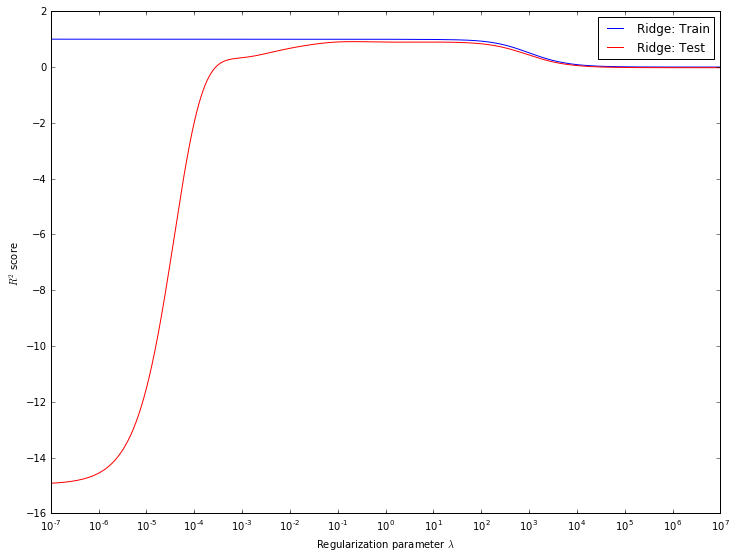

In [26]:
# Plot both values as a function of lambda
PlotR2(lambdas, train_r_squared, test_r_squared)


#### Explain the relationship between the regularization parameter and the training and test R^2 scores.
For the training set, lambda parameters approaching zero have little effect, it is only as value increases past 10<sup>3</sup> that the R<sup>2</sup> starts to fall.  
With the test set, R<sup>2</sup> is extremely poor at very small levels of lambda, where the model approaches that of an OLS and overfitting is very much happening. This is followed by a very rapid increase in the range from 10<sup>-6</sup> through 10<sup>-3</sup>. After that it still increases until it reaches it's maximum value around 10<sup>-0.68</sup>, levels off for a while in periods of increasing lambda, before dipping at around 10<sup>3</sup>.  
The dip in both R<sup>2</sup> at 10<sup>2</sup> may be due to the influence of one or more predictors being greatly reduced - their coefficient set very close to zero as lambda increases.


#### How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.
Using same train/test data, best R<sup>2</sup> under Ridge regression was about 0.9123880 while that of plain linear regression was ... rather lower at a highly negative -11.3050. It is notable that this R<sup>2</sup> value is what Ridge regression model outputs with a very low lambda of around 0.00001. Linear regression weights all of the coefficients at 100% while Ridge regression is able to greatly reduce the contribution that certain predictors make to the model - not dropping them but potentially reducing their effect by a large amount. Without the shrinkage Ridge regression introduces the model produced by OLS on this data set will always overfit due to number of predictors > number of observations, leading to practically infinite variance.

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

### <font color='darkgreen'>Solution, Part(d):</font>

In [27]:
# Evaluate the performance of the Ridge regression for diff regularization parameters lambda using 5-fold cross validation
#   or bootstrapping on the training set.

# going with bootstrap, some pieces of below from Lec06

def bootstrap_performance(x_train, y_train, lambda_value):
    # Size of the data set
    n = x_train.shape[0]

    # No. of subsamples
    num_samples = 100

    # Create a n  array to store coefficients for all subsamples
    coefs_a = np.zeros((num_samples,  x_train.shape[1]))

    # prep object for storing train info, not doing anything with test data
    train_r_squared = np.zeros(num_samples)

    for i in range(num_samples):

        # Generate a random subsample of data points
        # This is the bootstrap 
        perm =np.random.randint(low=0, high=n, size=n) # Generate a list of indices 0 to n and permute it
        x_subsample = x_train[perm] 
        y_subsample = y_train[perm] 
        
        reg = Ridge_Reg(alpha = 10**lambda_value)
        reg.fit(x_subsample, y_subsample)
        coeff_a[i,:] = reg.coef_

        # Evaluate train performance - lab did bootstrap on the entire dataset
        #  Here we are using using bootstrap on train, so makes sense to only look at the
        #  R^2 on train (which a post on piazza appeared to confirm)
        train_r_squared[i] = reg.score(x_train, y_train)
        

    # don't know which will be a better measure of the R^2s generated by all of the subsamples, store both
    train_r_squared_avg = np.mean(train_r_squared)
    train_r_squared_mdn = np.median(train_r_squared)

    return train_r_squared_avg, train_r_squared_mdn
    

# train_r_squared_avg, train_r_squared_mdn = bootstrap_performance(x_train, y_train, lambda_value=0.01)
# print train_r_squared_avg, train_r_squared_mdn

In [28]:
# Function to plot both median and avg R-squared stats as a function of lambda
def PlotR2_bootstrap(lambdas, r_squared_avg, r_squared_mdn, use_stats='both'):

    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    if use_stats=='both' or use_stats=='average':
        ax.semilogx(10**lambdas, (r_squared_avg), c='b', label='Ridge: Subsample Average R2')
    if use_stats=='both' or use_stats=='median':
        ax.semilogx(10**lambdas, (r_squared_mdn), c='r', label='Ridge: Subsample Median R2')

    ax.set_xlabel('Regularization parameter $\lambda$')
    ax.set_ylabel(r'$R^2$ score')

    ax.legend(loc = 'best')

    plt.show()

average R2 over subsamples, standard deviation: 0.234809022204
median R2 over subsamples, standard deviation: 0.213453494371

visualization makes me think median will be a more robust evaulation, less variation


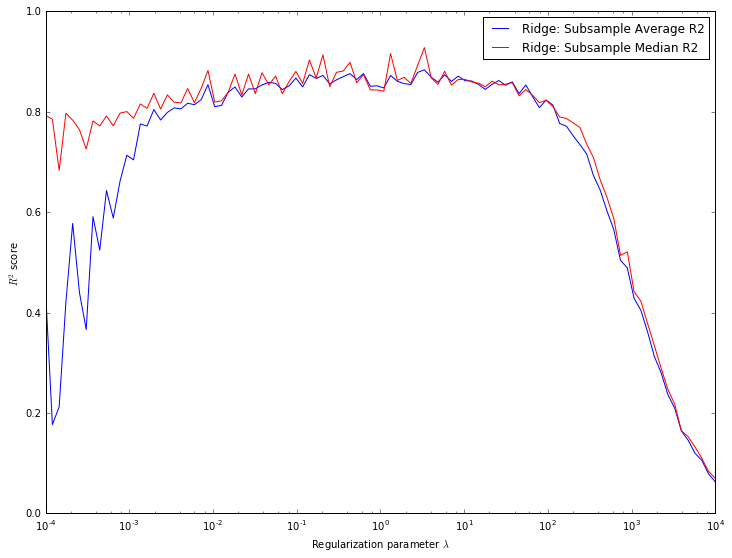

In [29]:
# idea here is to compare subsample avg R2 vs. median R2 to determine which will work better for final solution
lambda_min=-4
lambda_max=4
num_lambdas=100

# chop up the range into num_lambdas values, high num_lambdas will significantly smooth the curves
#  and of course more exact possible lambda values
lambdas = np.linspace(lambda_min, lambda_max, num_lambdas)
# tuple in format of lambda, avg R2, median R2
train_r_squared_by_lambda = np.zeros((num_lambdas, 3))

for ind, i in enumerate(lambdas):     
    train_r_squared_avg, train_r_squared_mdn = bootstrap_performance(x_train, y_train, lambda_value=i)
    train_r_squared_by_lambda[ind] = i, train_r_squared_avg, train_r_squared_mdn

# bootstrap_median is more robust
avg_std = train_r_squared_by_lambda[:,1].std()
avg_mdn = train_r_squared_by_lambda[:,2].std()
print 'average R2 over subsamples, standard deviation:', avg_std
print 'median R2 over subsamples, standard deviation:', avg_mdn
print
print 'visualization makes me think median will be a more robust evaulation, less variation'
PlotR2_bootstrap(lambdas, train_r_squared_by_lambda[:,1], train_r_squared_by_lambda[:,2] )


max (subsample-median) R^2: 0.899740061488


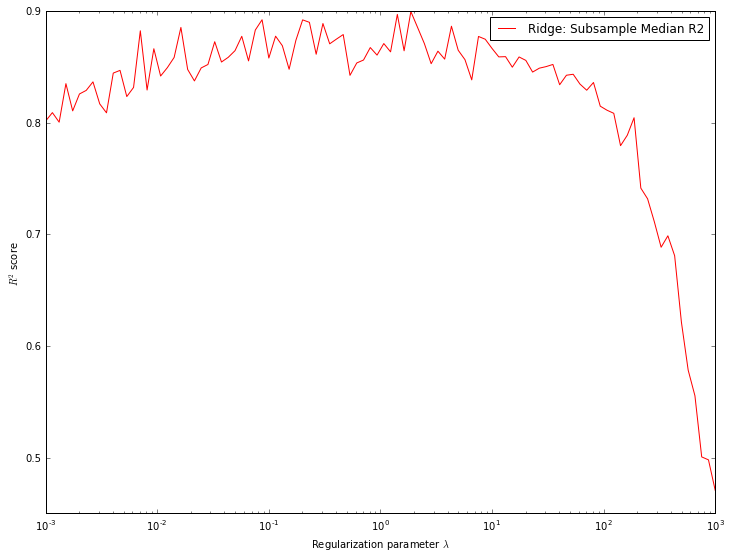

In [30]:
# Plot the cross-validation (CV) or bootstrapping R^2 score as a function of lambda

# cutting the lambda range down a bit, we already saw the plot, so make this one a bit more useful
lambda_min=-3
lambda_max=3
# increase for smoothness, decrease for fewer iterations (performance)
num_lambdas=100

lambdas = np.linspace(lambda_min, lambda_max, num_lambdas)
# tuple in format of lambda, avg R2, median R2  (though we'll be disregarding avg values now)
train_r_squared_by_lambda = np.zeros((num_lambdas, 3))

for ind, i in enumerate(lambdas):     
    _, train_r_squared_mdn = bootstrap_performance(x_train, y_train, lambda_value=i)
    train_r_squared_by_lambda[ind] = i, _, train_r_squared_mdn

print 'max (subsample-median) R^2: {}'.format(np.max(train_r_squared_by_lambda[:,2]))
PlotR2_bootstrap(lambdas, train_r_squared_by_lambda[:,1], train_r_squared_by_lambda[:,2], use_stats='median' )


#### How closely does the CV score or bootstrapping score match the R^2 score on the test set?

The R^2 from from the test set in the earlier Ridge Regression from part c has been re-displayed below, but with more of a focus on the actual area that will matter. In that re-produced test set plot we can see a max R^2 of 0.9123. The max R^2 score above from boostrapping, using subsample median R^2 values is 0.89, not all that different.

Regression: max R^2 score on training set 0.999846532953
  Achieved with lambda value: 10**-3.4964964965
Regression: max R^2 score on test set 0.912388097506
  Achieved with lambda value: 10**-0.67967967968


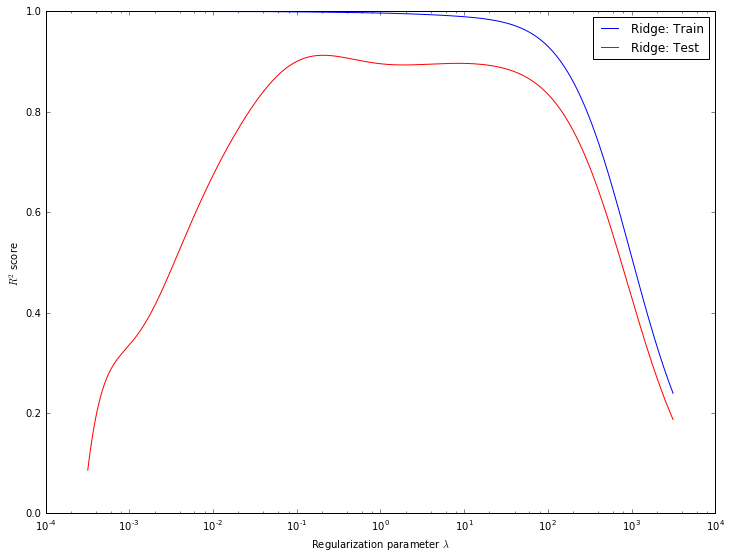

In [31]:
# redo the Ridge regressoin models so as to avoid variable polution
train_r_squared, test_r_squared, coeff_a, lambdas = MyRidgeReg(x_train, x_test, num_lambdas=1000)
# but with only the middle set of numbers - have already seen that is the general area we are concerned with
#  and the original plot was hard to read due to scaling issues with very negative R^2
subset_begin = int(train_r_squared.size*.25)
subset_end = int(train_r_squared.size*.75)

PlotR2(lambdas[subset_begin:subset_end], train_r_squared[subset_begin:subset_end], test_r_squared[subset_begin:subset_end])


#### Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?  

Can't say I really understand this question... ran out of time anyway.


#### Does the model chosen by CV or bootstrapping perform better than plain linear regression?  

With standard linear regression there was a highly negative test R^2 of around -11.3, so certainly the bootstrapping, which used Ridge regression, had superior performance.

## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

### <font color='darkgreen'>Solution, Part(a):</font>

NOTE: I left this one to the end and ran out of time. That being said, my linear algebra is minimal and it has been decades since a formal math class so a few more hours probably wouldn't haave helped.
I can see the p zeros added to vector y will result in an attempt by the model to shrink each coefficient toward zero since those p zeros become what it is trying to estimate...the transpose multiplication ($ X^TX $) will result in each $ \sqrt{\lambda}\ $ being being multipled by itself 


I'm left with writing this, the definition for least squares regression:

$ w = (X^TX)^{-1}  X^TY$

becoming the ridge regression solution:

$ w = (X^T\,X + \lambda I)^{-1} X^T Y $

somehow... 

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

### <font color='darkgreen'>Solution, Part(b):</font>

Since the question is only asking for a single holistic grade and not a breakdown within those categories, I'll go with a 1.5 if that is available. Pressed for a whole number, assuming none of the starter code was available in a lab etc., I'll go with a 2. The student seemed to have a grasp of the concepts in terms of augmenting the matrixes etc. but there were many basic errors.

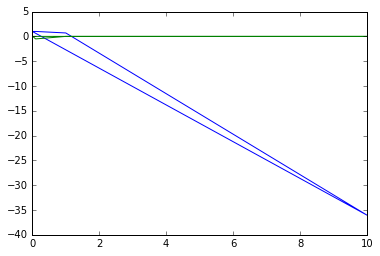

In [32]:
# Annotated original code, I tried to put my comments AFTER the the lines I was referring to

# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    # ERROR, want the number of predictors (p), not number of rows (n)   
    # BAD using n, should use p as variable name
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    # ERROR, should be axis = 0, to concatenate I along rows
    # ERROR, also, need concat matrix to be I matrix of square root of reg_param
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    # ERROR, already have n (# predictors) defined above, and only want to extend by that number
    # BAD created a temp array for no reason, better to simply concatenate the np.zero by axis=1
    for c in range(n):
        y_train_[c]= y_train[c]
        # BAD, just overwrote the np.zeros put into y_train, need to preserve those as dependent var
    import sklearn
    # BAD, place all imports at beginning, unless a very good reason not too, which I've run into a couple of times
    #    Also, if this is the only module being used, much better to import only LinearRegression from sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    # not sure about the reshape, don't need in my version but maybe it made sense given other code in this block
    return model


# ERROR, in the end we are still creating an OLS model and can use the .score() available via sklearn
#   An 'new' implementation of score would not use augmentation w/identity matrix etc.
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
#BAD: more robust train size better, e.g. 75% train, 25% test
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
#BAD: variable naming is vague (unless 'a' means something in stats etc.)
#BAD: 5 is treated as a magic number - use a decent variable instead and use again as appropriate below
for i in range(-2,2):
    #ERROR: should be range(-2,3), as-is a[4] is left at 0 instead of being 100 as intended
    a[i+2]=10**i
    
    
# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
# BAD variable names are vague, especially when working repeatedly with train/test better to include
#    "train" & "test" in the variable names
for j in range(0,5):    
    # MULTIPLE ERROR, below used mix of i & j, standardize to one
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
# BAD, x-axis needs to be log values + there are no labels overall
plt.plot(a,rstr)
plt.plot(a,rsts)

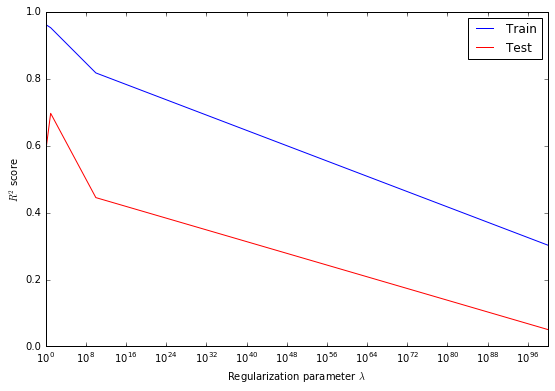

In [33]:
### MY VERSION ###
import sklearn

# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[1]    
    x_train=np.concatenate((x_train, np.sqrt(reg_param)*np.identity(n)),axis=0)
    y_train_ = np.zeros(n)
    y_train = np.concatenate((y_train, y_train_), axis=0)    
    model = sklearn.linear_model.LinearRegression()    
    model.fit(x_train,y_train)
    
    return model

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.75))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

num_models = 5

# Params
lambdas=np.zeros(num_models)
for i in range(-2,3):     
    lambdas[i+2]=10**i

# Iterate
r_score_train = np.zeros(num_models)
r_score_test = np.zeros(num_models)
for j in range(0,num_models):    
    m = ridge(x_train,y_train,lambdas[j])
    r_score_train[j] = m.score(x_train, y_train)
    r_score_test[j] = m.score(x_test, y_test)
    
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.semilogx(10.0**lambdas, r_score_train, c='b', label='Train')
ax.semilogx(10.0**lambdas, r_score_test, c='r', label='Test')
ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')

ax.legend(loc = 'best')



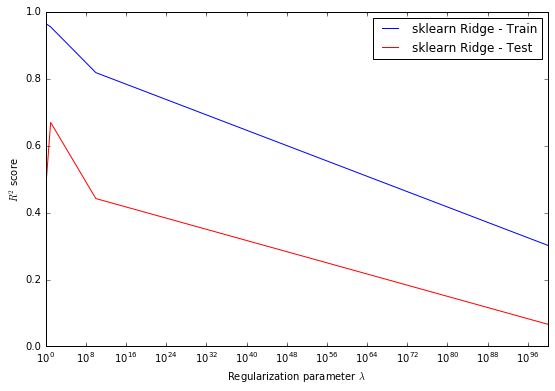

In [34]:
# lets compare my updated-submission to a native sklearn.linear_model.Ridge solver

# visually at least it looks like the same plot... dandy

num_models = 5

# Params
lambdas=np.zeros(num_models)
for i in range(-2,3):     
    lambdas[i+2]=10**i

# I'm setting up separate variables which I will submit to a native sklearn.linear_model.Ridge 
sklearn_reg_train = np.zeros(num_models)
sklearn_reg_test = np.zeros(num_models)

# Iterate
for j in range(0,num_models):    
    
    sklearn_reg_ridge = Ridge_Reg(alpha = lambdas[j])
    sklearn_reg_ridge.fit(x_train, y_train)
    
    sklearn_train_r2 = sklearn_reg_ridge.score(x_train, y_train)
    sklearn_test_r2 = sklearn_reg_ridge.score(x_test, y_test)
    sklearn_reg_train[j] = sklearn_train_r2
    sklearn_reg_test[j] = sklearn_test_r2
    
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.semilogx(10.0**lambdas, sklearn_reg_train, c='b', label='sklearn Ridge - Train')
ax.semilogx(10.0**lambdas, sklearn_reg_test, c='r', label='sklearn Ridge - Test')
ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')

ax.legend(loc = 'best')


## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_3.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 